In [6]:
from sklearn.metrics import confusion_matrix
from keras import layers
import tensorflow.keras.models as models
from tensorflow.keras import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.layers import (Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten,
                          Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D)
from sklearn.model_selection import KFold

In [ ]:
!unzip images_original.zip -d /content

In [8]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import os
import numpy as np
import librosa
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import Input
from keras.applications.vgg19 import VGG19
from keras.models import Model

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

def read_data(src_dir, genres):
    # Empty array of dicts with the processed features from all files
    arr_fn = []
    arr_genres = []

    # Get file list from the folders
    for x,_ in genres.items():
        folder = src_dir+'/' + x
        for root, subdirs, files in os.walk(folder):
            for file in files:
                file_name = folder + "/" + file
                image = Image.open(file_name).convert("RGB")
                image = np.asarray(image.crop((54, 35, 390, 253)), dtype = float )
                # Save the file name and the genre
                arr_fn.append(image)
                arr_genres.append(genres[x])
    return np.array(arr_fn), np.array(arr_genres)

gtzan_dir = 'images_original'
class_names ={'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4,
          'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
samples, labels = read_data(gtzan_dir, class_names)
samples /= 255.0

Model Source: https://towardsdatascience.com/music-genre-recognition-using-convolutional-neural-networks-cnn-part-1-212c6b93da76

In [9]:
def GenreModel(input_shape=(218, 336, 3), classes=10):
    X_input = Input(input_shape)

    X = Conv2D(8, kernel_size=(3, 3), strides=(1, 1))(X_input)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2))(X)

    X = Conv2D(16, kernel_size=(3, 3), strides=(1, 1))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2))(X)

    X = Conv2D(32, kernel_size=(3, 3), strides=(1, 1))(X)
    X = BatchNormalization(axis=3)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2))(X)

    X = Conv2D(64, kernel_size=(3, 3), strides=(1, 1))(X)
    X = BatchNormalization(axis=-1)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2))(X)

    X = Conv2D(128, kernel_size=(3, 3), strides=(1, 1))(X)
    X = BatchNormalization(axis=-1)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2))(X)

    X = Flatten()(X)

    X = Dropout(rate=0.3)(X)

    X = Dense(classes, activation='softmax', name='fc' + str(classes))(X)

    model = Model(inputs=X_input, outputs=X, name='GenreModel')

    return model
model = GenreModel()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
print(model.summary())

Model: "GenreModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 218, 336, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 216, 334, 8)       224       
                                                                 
 batch_normalization_5 (Batc  (None, 216, 334, 8)      32        
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 216, 334, 8)       0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 108, 167, 8)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 106, 165, 16)      1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/40
25/25 - 47s - loss: 0.5352 - accuracy: 0.8786 - val_loss: 6.0676 - val_accuracy: 0.3600 - 47s/epoch - 2s/step
Epoch 2/40
25/25 - 50s - loss: 0.3417 - accuracy: 0.9111 - val_loss: 1.5803 - val_accuracy: 0.6600 - 50s/epoch - 2s/step
Epoch 3/40
25/25 - 47s - loss: 0.2569 - accuracy: 0.9262 - val_loss: 3.4680 - val_accuracy: 0.5600 - 47s/epoch - 2s/step
Epoch 4/40
25/25 - 47s - loss: 0.2012 - accuracy: 0.9374 - val_loss: 2.4049 - val_accuracy: 0.6200 - 47s/epoch - 2s/step
Epoch 5/40
25/25 - 48s - loss: 0.1299 - accuracy: 0.9574 - val_loss: 0.6479 - val_accuracy: 0.8750 - 48s/epoch - 2s/step
Epoch 6/40
25/25 - 47s - loss: 0.0864 - accuracy: 0.9737 - val_loss: 1.0525 - val_accuracy: 0.8000 - 47s/epoch - 2s/step
Epoch 7/40
25/25 - 49s - loss: 0.0275 - accuracy: 0.9937 - val_loss: 1.4099 - val_accuracy: 0.7450 - 49s/epoch - 2s/step
Epoch 8/40
25/25 - 47s - loss: 0.0524 - accuracy: 0.9900

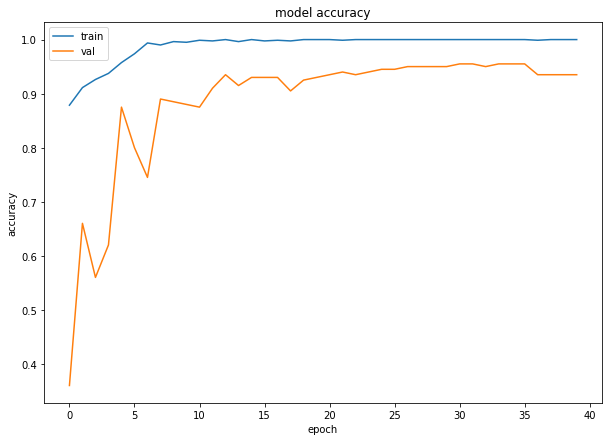

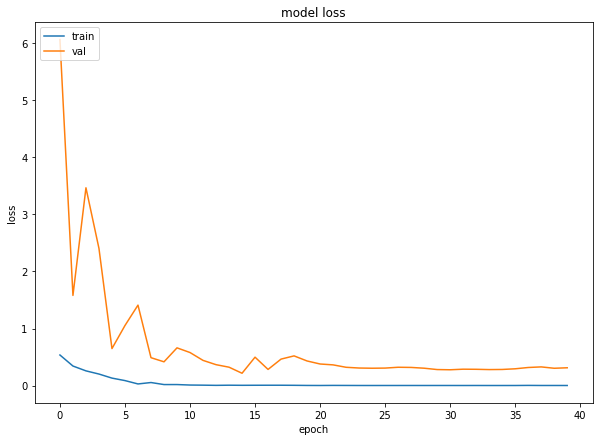

Score for fold 1: loss of 0.31109705567359924; accuracy of 93.50000023841858%


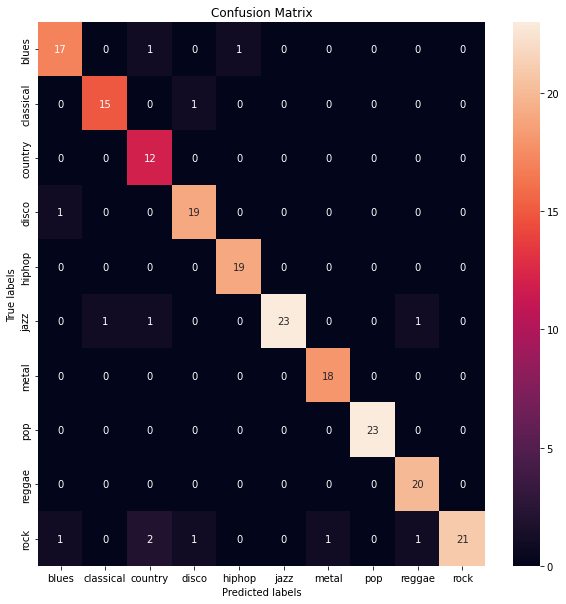

------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/40
25/25 - 47s - loss: 0.2902 - accuracy: 0.9237 - val_loss: 4.5210 - val_accuracy: 0.5000 - 47s/epoch - 2s/step
Epoch 2/40
25/25 - 48s - loss: 0.2338 - accuracy: 0.9249 - val_loss: 1.2438 - val_accuracy: 0.7700 - 48s/epoch - 2s/step
Epoch 3/40
25/25 - 47s - loss: 0.1140 - accuracy: 0.9637 - val_loss: 1.2384 - val_accuracy: 0.7600 - 47s/epoch - 2s/step
Epoch 4/40
25/25 - 48s - loss: 0.0952 - accuracy: 0.9675 - val_loss: 0.4159 - val_accuracy: 0.8600 - 48s/epoch - 2s/step
Epoch 5/40
25/25 - 47s - loss: 0.0864 - accuracy: 0.9700 - val_loss: 1.0127 - val_accuracy: 0.8250 - 47s/epoch - 2s/step
Epoch 6/40
25/25 - 47s - loss: 0.1247 - accuracy: 0.9599 - val_loss: 2.2300 - val_accuracy: 0.6350 - 47s/epoch - 2s/step
Epoch 7/40
25/25 - 48s - loss: 0.0653 - accuracy: 0.9812 - val_loss: 0.4360 - val_accuracy: 0.8650 - 48s/epoch - 2s/step
Epoch 8/40
25/25 - 47s - loss: 0.0722 - accuracy: 0.9787

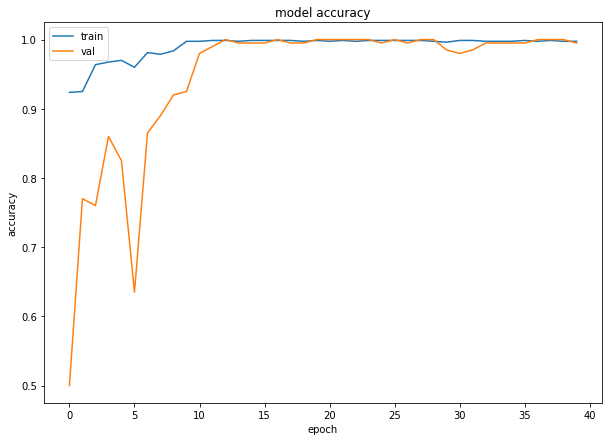

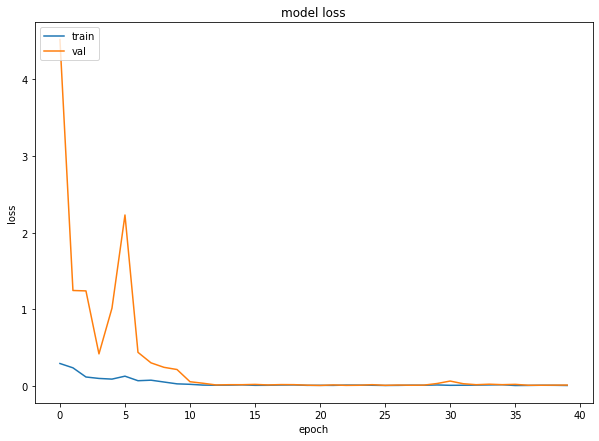

Score for fold 2: loss of 0.008668627589941025; accuracy of 99.50000047683716%


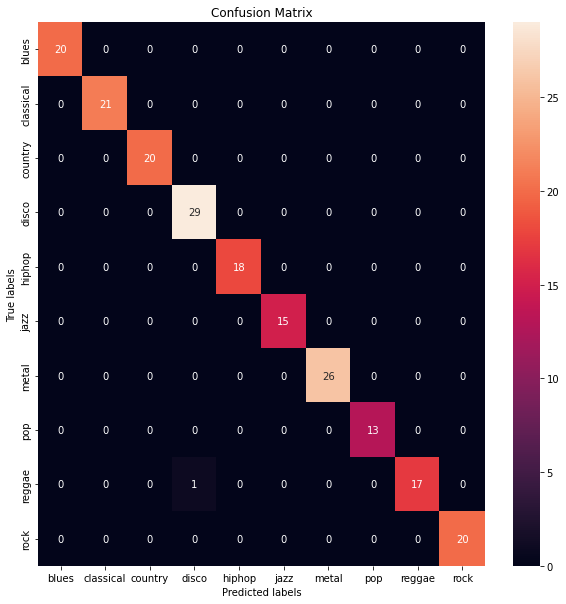

------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/40
25/25 - 48s - loss: 0.0073 - accuracy: 0.9975 - val_loss: 0.0153 - val_accuracy: 0.9950 - 48s/epoch - 2s/step
Epoch 2/40
25/25 - 47s - loss: 0.0378 - accuracy: 0.9862 - val_loss: 0.0345 - val_accuracy: 0.9900 - 47s/epoch - 2s/step
Epoch 3/40
25/25 - 47s - loss: 0.0292 - accuracy: 0.9925 - val_loss: 1.7444 - val_accuracy: 0.7000 - 47s/epoch - 2s/step
Epoch 4/40
25/25 - 48s - loss: 0.0116 - accuracy: 0.9950 - val_loss: 0.0376 - val_accuracy: 0.9900 - 48s/epoch - 2s/step
Epoch 5/40
25/25 - 47s - loss: 0.0120 - accuracy: 0.9962 - val_loss: 0.1091 - val_accuracy: 0.9800 - 47s/epoch - 2s/step
Epoch 6/40
25/25 - 48s - loss: 0.0044 - accuracy: 0.9975 - val_loss: 0.0381 - val_accuracy: 0.9900 - 48s/epoch - 2s/step
Epoch 7/40
25/25 - 47s - loss: 0.0124 - accuracy: 0.9950 - val_loss: 0.1195 - val_accuracy: 0.9600 - 47s/epoch - 2s/step
Epoch 8/40
25/25 - 47s - loss: 0.0083 - accuracy: 0.9975

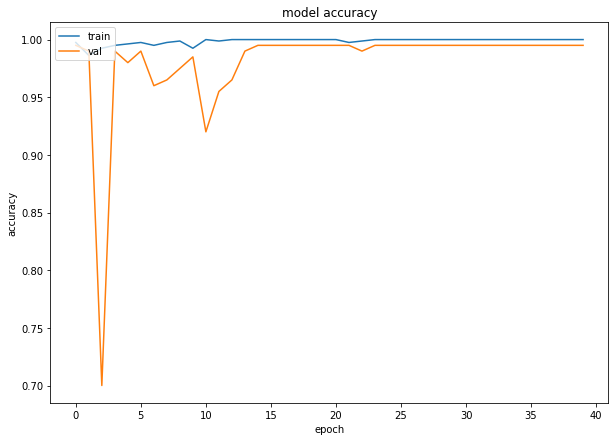

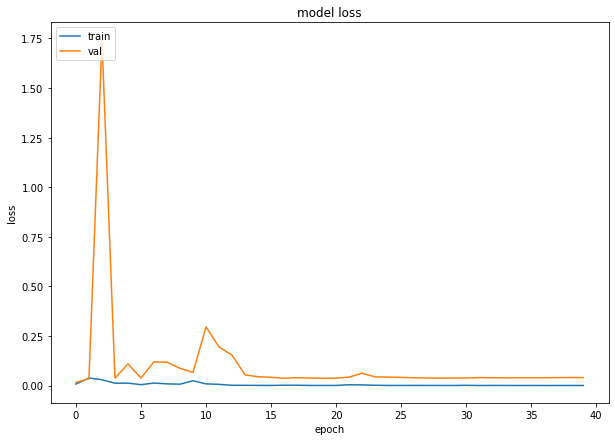

Score for fold 3: loss of 0.04015246406197548; accuracy of 99.50000047683716%


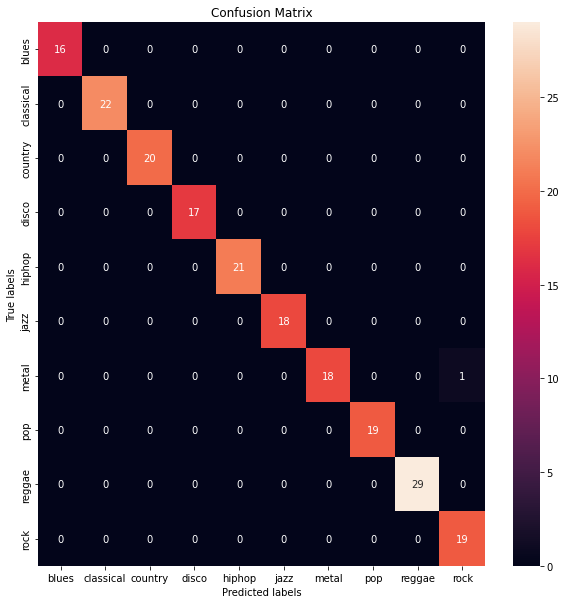

------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/40
25/25 - 48s - loss: 0.0172 - accuracy: 0.9987 - val_loss: 1.0997e-05 - val_accuracy: 1.0000 - 48s/epoch - 2s/step
Epoch 2/40
25/25 - 47s - loss: 0.0096 - accuracy: 0.9987 - val_loss: 0.0380 - val_accuracy: 0.9900 - 47s/epoch - 2s/step
Epoch 3/40
25/25 - 48s - loss: 0.0496 - accuracy: 0.9887 - val_loss: 1.7472 - val_accuracy: 0.7050 - 48s/epoch - 2s/step
Epoch 4/40
25/25 - 47s - loss: 0.0495 - accuracy: 0.9837 - val_loss: 0.0720 - val_accuracy: 0.9750 - 47s/epoch - 2s/step
Epoch 5/40
25/25 - 48s - loss: 0.1025 - accuracy: 0.9775 - val_loss: 5.8466 - val_accuracy: 0.5700 - 48s/epoch - 2s/step
Epoch 6/40
25/25 - 47s - loss: 0.1128 - accuracy: 0.9700 - val_loss: 0.9983 - val_accuracy: 0.7950 - 47s/epoch - 2s/step
Epoch 7/40
25/25 - 47s - loss: 0.1140 - accuracy: 0.9687 - val_loss: 0.5945 - val_accuracy: 0.9000 - 47s/epoch - 2s/step
Epoch 8/40
25/25 - 48s - loss: 0.0834 - accuracy: 0.

In [ ]:
# Define per-fold score containers
num_folds = 5
no_epochs = 40
acc_per_fold = []
loss_per_fold = []

# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(samples, labels):
  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(samples[train], labels[train],
              epochs=no_epochs,
              validation_data=(samples[test], labels[test]),
              verbose=2)
  
  plt.figure(figsize = (10,7))
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  plt.figure(figsize = (10,7))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  # Generate generalization metrics
  scores = model.evaluate(samples[test], labels[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  predictions = model.predict(samples[test])
  plt.figure(figsize = (10,10))
  ax= plt.subplot()
  cm = confusion_matrix(labels[test], np.asarray(predictions).argmax(axis=1))
  import seaborn as sns
  sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix'); 
  ax.xaxis.set_ticklabels(class_names.keys()); ax.yaxis.set_ticklabels(class_names.keys());
  plt.show()
  # Increase fold number
  fold_no = fold_no + 1

In [ ]:

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')